<a href="https://colab.research.google.com/github/Cemrekucukg/weather-forecast/blob/main/weather_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🌤️ Weather Forecast Project  
Predicting daily temperature using machine learning models.  
This notebook includes data loading, EDA, feature engineering, and model training steps.

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost


## 📦 Import Libraries
Load required packages for data handling, visualization, and modeling.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


## 📥 Load Dataset from Kaggle
We use the dataset: [Weather Dataset](https://www.kaggle.com/datasets/muthuj7/weather-dataset)  
Upload your `kaggle.json` API token to access and download data directly.


In [19]:
import os, zipfile


os.makedirs("/root/.kaggle", exist_ok=True)
!cp "/content/kaggle (1).json" /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json


!kaggle datasets download -d muthuj7/weather-dataset -p /content/


with zipfile.ZipFile("/content/weather-dataset.zip", "r") as zip_ref:
    zip_ref.extractall("/content/weather_data")

!ls /content/weather_data


Dataset URL: https://www.kaggle.com/datasets/muthuj7/weather-dataset
License(s): CC0-1.0
weather-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
weatherHistory.csv


## 🔍 Step 6 — Load and Explore the Data  
Let's read the dataset into a pandas DataFrame and explore the first few rows.


In [20]:
import pandas as pd

df = pd.read_csv("/content/weather_data/weatherHistory.csv")

df.head()


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## 🧾 Step 7 — Basic Info and Summary Statistics  
Check data types, missing values, and basic descriptive statistics.


In [21]:
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB

Missing values per column:
Formatted Date                0
Summary  

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


## 📊 Step 8 — Data Visualization  
Let's visualize distributions and relationships between key weather variables.


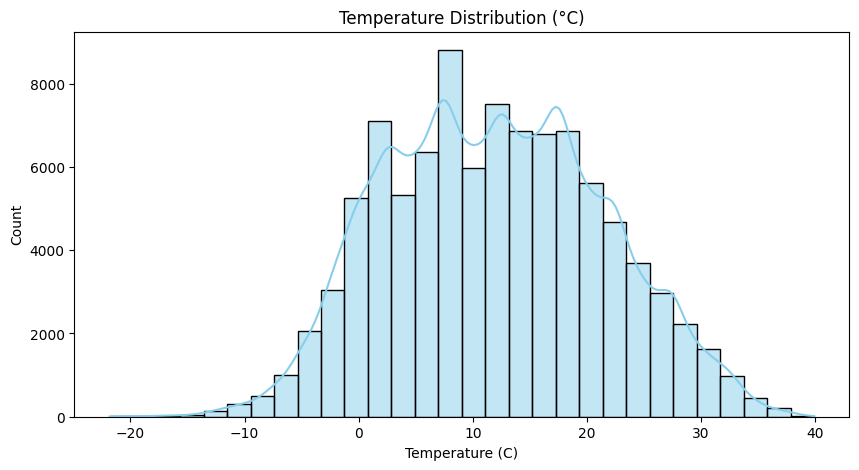

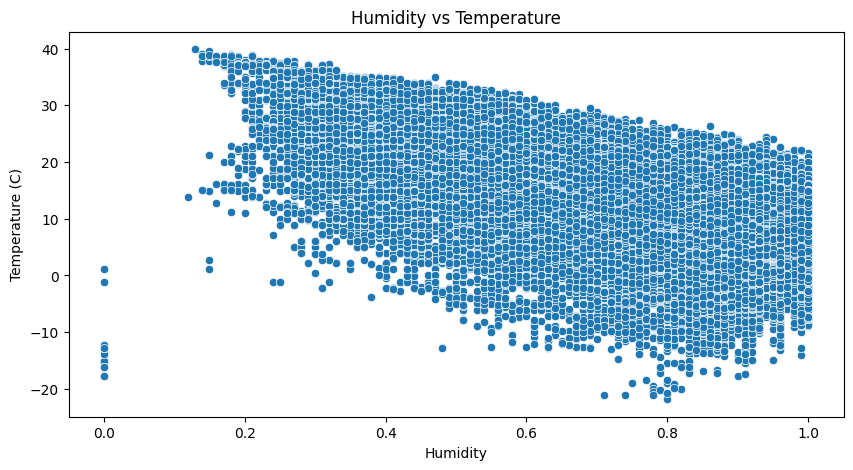

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["Temperature (C)"], bins=30, kde=True, color="skyblue")
plt.title("Temperature Distribution (°C)")
plt.show()

plt.figure(figsize=(10,5))
sns.scatterplot(x=df["Humidity"], y=df["Temperature (C)"])
plt.title("Humidity vs Temperature")
plt.show()


## 🧠 Step 9 — Feature Engineering  
We'll create new features from the date/time column and prepare the dataset for modeling.


In [23]:
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], errors="coerce", utc=True)

df = df.dropna(subset=["Formatted Date"])


df["Year"] = df["Formatted Date"].dt.year
df["Month"] = df["Formatted Date"].dt.month
df["Hour"] = df["Formatted Date"].dt.hour


df = df.drop(columns=["Summary", "Daily Summary", "Precip Type"], errors="ignore")

df.head()


,Formatted Date,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Year,Month,Hour
0,2006-03-31 22:00:00+00:00,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,2006,3,22
1,2006-03-31 23:00:00+00:00,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,2006,3,23
2,2006-04-01 00:00:00+00:00,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,2006,4,0
3,2006-04-01 01:00:00+00:00,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,2006,4,1
4,2006-04-01 02:00:00+00:00,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,2006,4,2


## ⚙️ Step 10 — Model Training  
We'll train a simple regression model to predict temperature based on other variables.


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df[["Apparent Temperature (C)", "Humidity", "Wind Speed (km/h)", "Visibility (km)", "Pressure (millibars)"]]
y = df["Temperature (C)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}")
print(f"MSE: {mse:.3f}")
print(f"R²: {r2:.3f}")


MAE: 0.012
MSE: 0.002
R²: 1.000


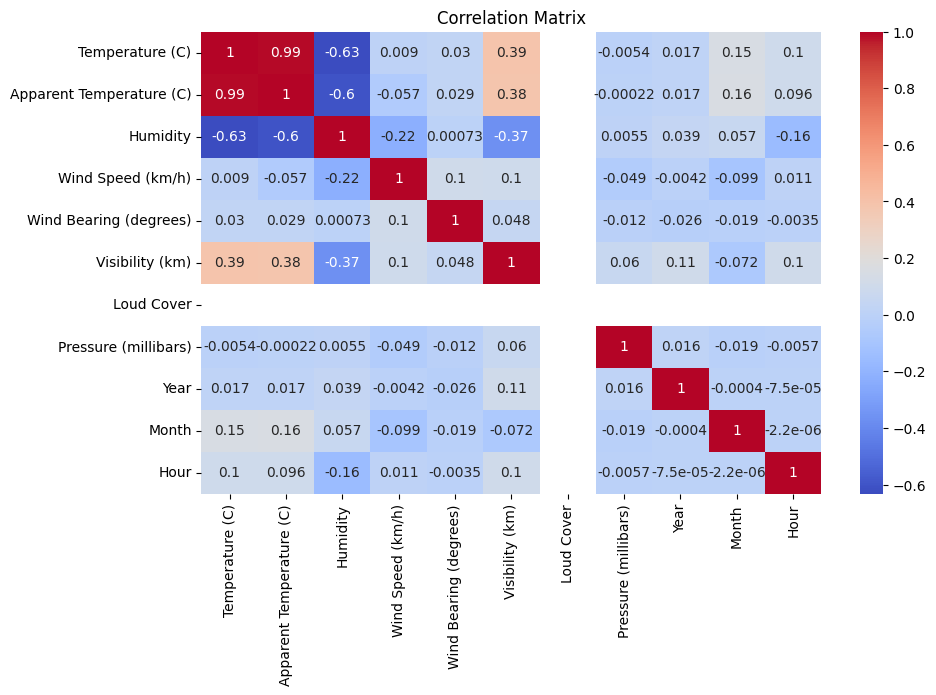

In [25]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 📈 Step 11 — Model Evaluation Visualization  

Now that our model is trained, let's visualize how well it performed by comparing  
the **actual** vs **predicted** temperature values.  
This helps us see if the model tends to over- or under-predict.


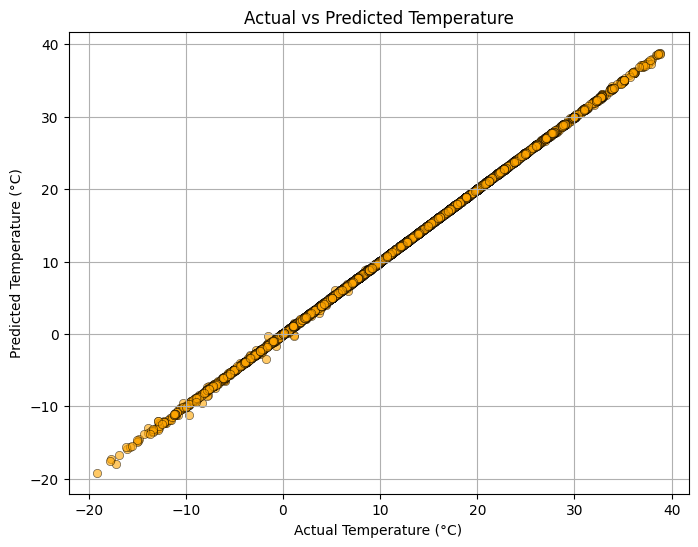

In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color="orange", edgecolor="black")
plt.xlabel("Actual Temperature (°C)")
plt.ylabel("Predicted Temperature (°C)")
plt.title("Actual vs Predicted Temperature")
plt.grid(True)
plt.show()


## 🧩 Step 12 — Retrain Model Without Apparent Temperature  
To make the model more realistic, we'll remove the highly correlated feature  
(`Apparent Temperature`) and retrain using only independent weather variables.


In [27]:
X = df[["Humidity", "Wind Speed (km/h)", "Visibility (km)", "Pressure (millibars)"]]
y = df["Temperature (C)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_v2 = RandomForestRegressor(n_estimators=100, random_state=42)
model_v2.fit(X_train, y_train)
y_pred_v2 = model_v2.predict(X_test)

mae_v2 = mean_absolute_error(y_test, y_pred_v2)
mse_v2 = mean_squared_error(y_test, y_pred_v2)
r2_v2 = r2_score(y_test, y_pred_v2)

print(f"MAE: {mae_v2:.3f}")
print(f"MSE: {mse_v2:.3f}")
print(f"R²: {r2_v2:.3f}")


MAE: 4.422
MSE: 32.955
R²: 0.642


## 🖥️ Step 13 — Create a Streamlit App  
We’ll build a simple web interface where users can input weather parameters  
(Humidity, Wind Speed, Visibility, Pressure) and get a predicted temperature.  


In [28]:
%%writefile app.py
import streamlit as st
import joblib
import numpy as np

# Load trained model
model = joblib.load("weather_model.pkl")

st.title("🌤️ Weather Temperature Prediction App")
st.write("Enter weather conditions below to get a temperature prediction:")

# User inputs
humidity = st.slider("Humidity (%)", 0, 100, 50)
wind_speed = st.number_input("Wind Speed (km/h)", min_value=0.0, max_value=50.0, value=10.0)
visibility = st.number_input("Visibility (km)", min_value=0.0, max_value=20.0, value=10.0)
pressure = st.number_input("Pressure (millibars)", min_value=900.0, max_value=1100.0, value=1013.0)

# Predict button
if st.button("Predict Temperature"):
    input_data = np.array([[humidity/100, wind_speed, visibility, pressure]])
    prediction = model.predict(input_data)[0]
    st.success(f"🌡️ Predicted Temperature: {prediction:.2f} °C")


Overwriting app.py


In [29]:
import joblib
joblib.dump(model, "weather_model.pkl")
print("✅ Model kaydedildi: weather_model.pkl")


✅ Model kaydedildi: weather_model.pkl


# 🟩 Step 14 — Run the Streamlit App Directly in Colab (Simplified)

Instead of using ngrok or localtunnel, we’ll render the Streamlit interface
directly inside the Colab output cell using the `streamlit_jupyter` bridge.
This approach:
- runs completely inside Colab (no external tunneling)
- avoids password or token issues
- lets you interact with the app inline


In [30]:
# Streamlit-Jupyter inline app
from streamlit_jupyter import StreamlitPatcher
import streamlit as st
import joblib, numpy as np
StreamlitPatcher().jupyter()

st.title("🌤️ Weather Temperature Prediction App (Colab Mode)")
st.write("Enter weather parameters below to predict the temperature:")

humidity = st.slider("Humidity (%)", 0, 100, 50)
wind_speed = st.number_input("Wind Speed (km/h)", 0.0, 50.0, 10.0)
visibility = st.number_input("Visibility (km)", 0.0, 20.0, 10.0)
pressure = st.number_input("Pressure (millibars)", 900.0, 1100.0, 1013.0)

model = joblib.load("weather_model.pkl")

if st.button("Predict Temperature"):
    X = np.array([[humidity/100, wind_speed, visibility, pressure]])
    pred = model.predict(X)[0]
    st.success(f"🌡️ Predicted Temperature: {pred:.2f} °C")


# 🌤️ Weather Temperature Prediction App (Colab Mode)

Enter weather parameters below to predict the temperature:

2025-10-23 11:07:15.167 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 11:07:15.169 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 11:07:15.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 11:07:15.173 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 11:07:15.174 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 11:07:15.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 11:07:15.177 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-23 11:07:15.178 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar